# UMAP Plotting

## Imports

In [1]:
import sys 
import os
import pathlib
print(sys.version)

utils_path = pathlib.Path(os.getcwd() + '/utils')  # i suspect this one is not needed
print(utils_path.exists())
print(os.getcwd())
#sys.path.append(str(utils_path))  # may not be necessary
#sys.path.append(os.getcwd())  # i thnk this is the one that works 
sys.path.append('../') # this one is one level up so we can see the utils lib
print(sys.path)

import numpy as np
import sklearn
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from utils.data import Data
from utils.config import Config

3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]
True
/home/mutaz/ilab1
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mutaz/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/mutaz/.local/lib/python3.6/site-packages/IPython/extensions', '/home/mutaz/.ipython', '../']


In [2]:
## plotting functions

In [3]:
def plot_umaps(plot_df, colorby, title=None, filename=None):
    n = plot_df.shape[0]
    for i, c in enumerate(colorby):
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,i+1)
        #plt.figure(figsize=(10, 10))
        plt.scatter(data=plot_df, x='x', y='y', c=c, alpha=.1)
        plt.gca().set_aspect('equal', 'datalim')
        plt.title(f'UMAP {colorby[0]} projection\n 300K features \n({c},{n})', fontsize=24);
        plt.axis('off')
        plt.colorbar()
        #plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_{c}.png', transparent=True)

In [4]:
def plot_umap(plot_df, colorby, filename=None):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x='x', y='y',
        hue=colorby,
        palette=sns.color_palette("husl", 2),
        data=plot_df,
        alpha=0.9
    )
    plt.legend(loc='upper left')
    plt.axis('off')
    #plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_commensurate_bool.png', transparent=True)
    plt.show()

In [5]:
def plot_umap_v2(plot_df, colorby, filename=None):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x='x', y='y',
        palette=sns.color_palette("husl", 2),
        data=plot_df,
        alpha=0.9
    )

    sns.scatterplot(
        x='x', y='y',
        palette=sns.color_palette("husl", 2),
        data=plot_df[plot_df[colorby] == True],
        alpha=0.9
    )

    plt.axis('off')
    #plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_commensurate_bool.png', transparent=True)
    plt.show()


# Plotting


## load plotting data files

In [9]:
colorby = ['C33','commensurate']

In [10]:
neighbors = [25]
fn_pattern = 'umap_300Kdf_C33_296835_{}_2.csv'

## create layered plot 

use plot_umap2 for commensurate and dft flags... may need to update the funciton for three flags 

## old stuff -- remove

umap_300Kdf_C33_296835_25_2.csv


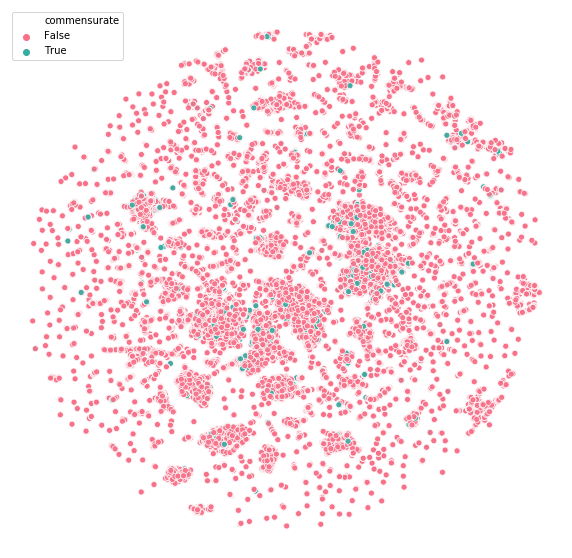

In [11]:
for n in neighbors: 
    filename = fn_pattern.format(n)
    print(filename)
    plot_df = pd.read_csv(Config().get_datapath(filename))
    plot_umap(plot_df, colorby[1])
    

umap_300Kdf_C33_296835_25_2.csv


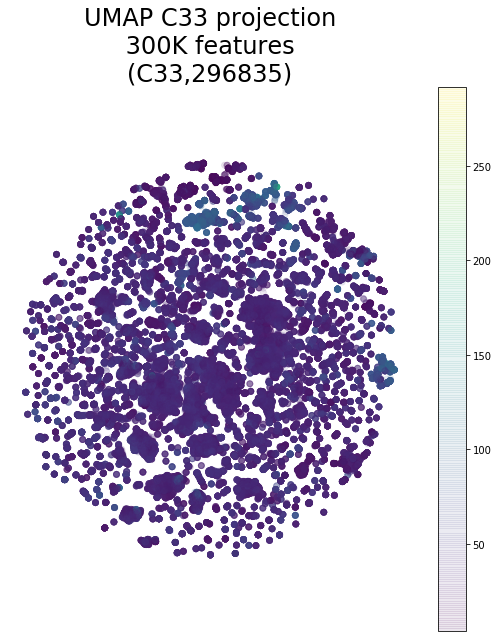

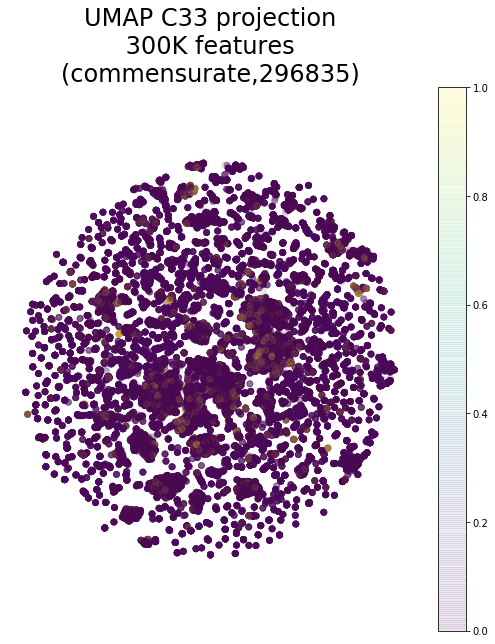

In [12]:
for n in neighbors: 
    filename = fn_pattern.format(n)
    print(filename)
    plot_df = pd.read_csv(Config().get_datapath(filename))
    plot_umaps(plot_df, colorby)

In [13]:
plot_df.head()

,uid,x,y,C33,commensurate
0,Mg2P2Se6_Nb2Br4O2,10.494839,8.298416,21.138852,False
1,Mg2P2Se6_Ta4Ni2Se10,-2.565360,15.142380,45.795976,False
2,Lu2C1Cl2_Mn2P2Se6,7.703775,0.363671,36.373035,False
3,Cr1I2_Re1Te2,12.500740,3.538425,55.183358,False
4,Cu2Ge2O6-T1_Mg1Re2O8,-3.723206,9.324949,35.054291,False
